In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("month.csv", header=None, names=["time","counts","span"])

UNIX時間を標準時に変更

In [3]:
import datetime

In [4]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

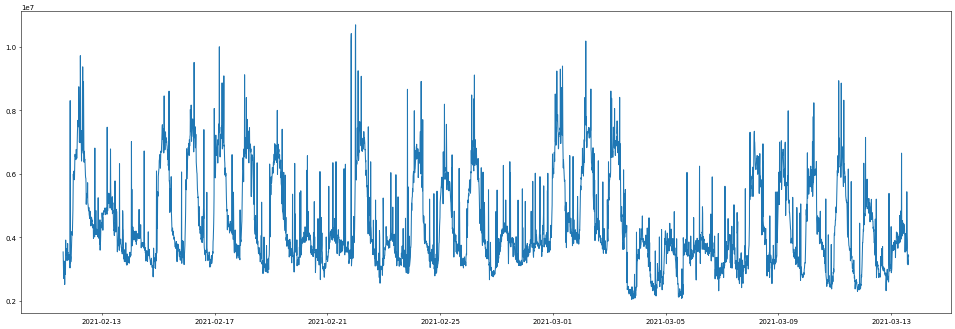

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(24, 8), dpi=50)
plt.plot(df['time'], df['counts'])


In [13]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
Q = df['counts']

<ipython-input-23-f819d1d0ba8f>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(Q, freq=7)


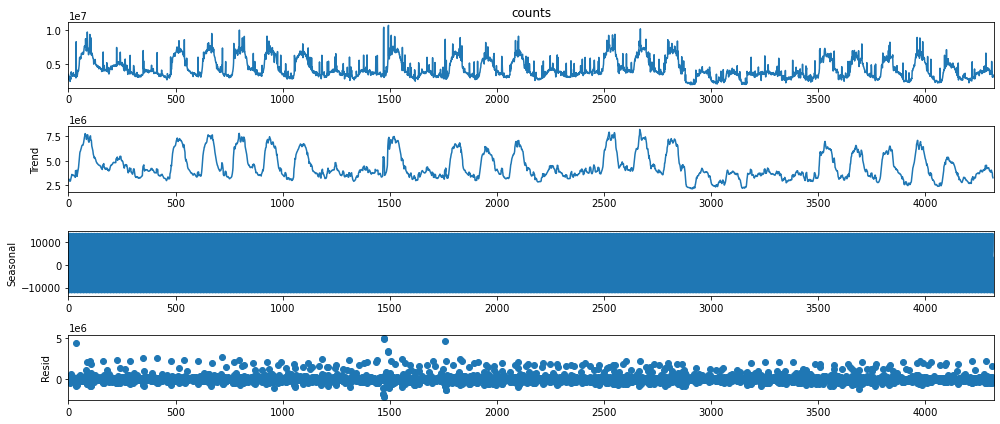

<Figure size 1200x400 with 0 Axes>

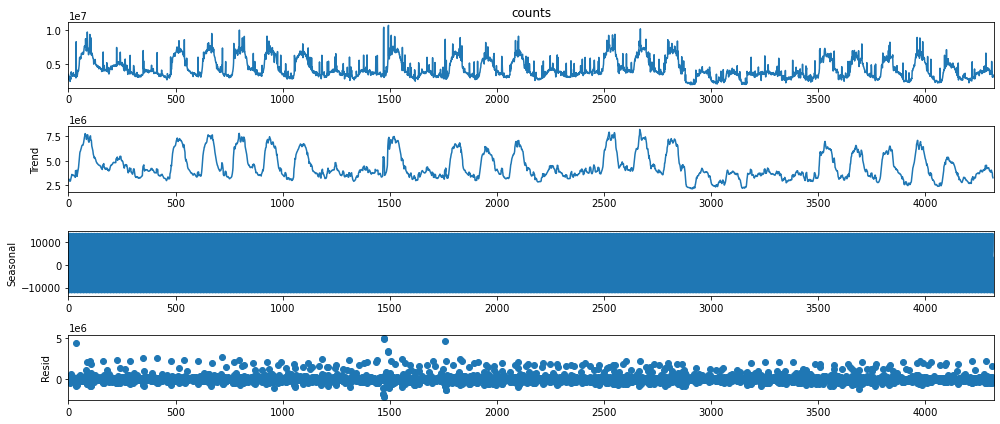

In [23]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(Q, freq=7)

plt.rcParams["figure.figsize"] = (14, 6)
plt.figure(figsize=(24, 8), dpi=50)
res.plot()



季節変動だけ取り除く

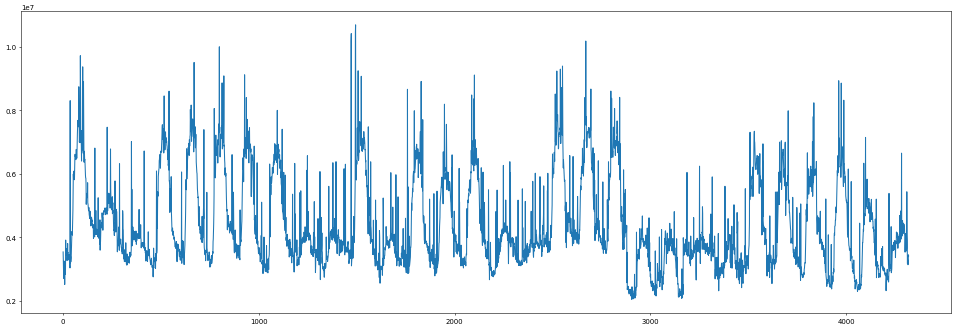

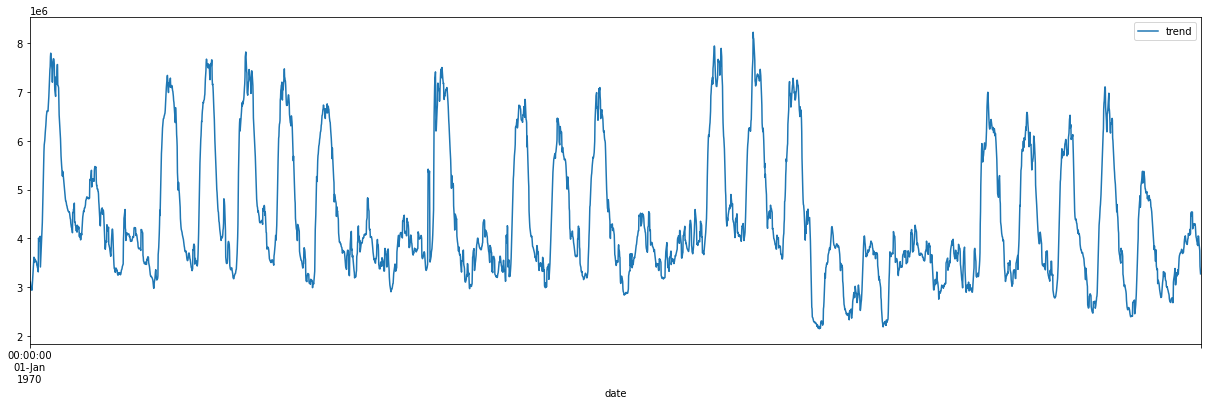

In [35]:
trend = res.trend
trend = pd.DataFrame({'trend': trend, 'date':Q.index})
trend['date'] = pd.to_datetime(trend['date'], format='%Y-%m-%d')
trend = trend.set_index(['date'])

plt.rcParams["figure.figsize"] = (21, 6)

plt.figure(figsize=(24, 8), dpi=50)

plt.plot(Q)
trend = trend.plot()
